In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx


In [14]:
bologna_trees_url = "https://opendata.comune.bologna.it/api/explore/v2.1/catalog/datasets/alberi-manutenzioni/exports/geojson?lang=it&timezone=Europe%2FRome"
statistical_areas_url ="https://opendata.comune.bologna.it/api/explore/v2.1/catalog/datasets/aree-statistiche/exports/shp?lang=it&timezone=Europe%2FRome"
green_areas_url = "https://opendata.comune.bologna.it/api/explore/v2.1/catalog/datasets/verde/exports/shp?lang=it&timezone=Europe%2FBerlin"

In [27]:
bologna_trees = gpd.read_file(bologna_trees_url,format="GeoJSON")

In [28]:
bologna_trees.shape

(85652, 16)

In [37]:
bologna_trees = bologna_trees.to_crs(epsg=32632)

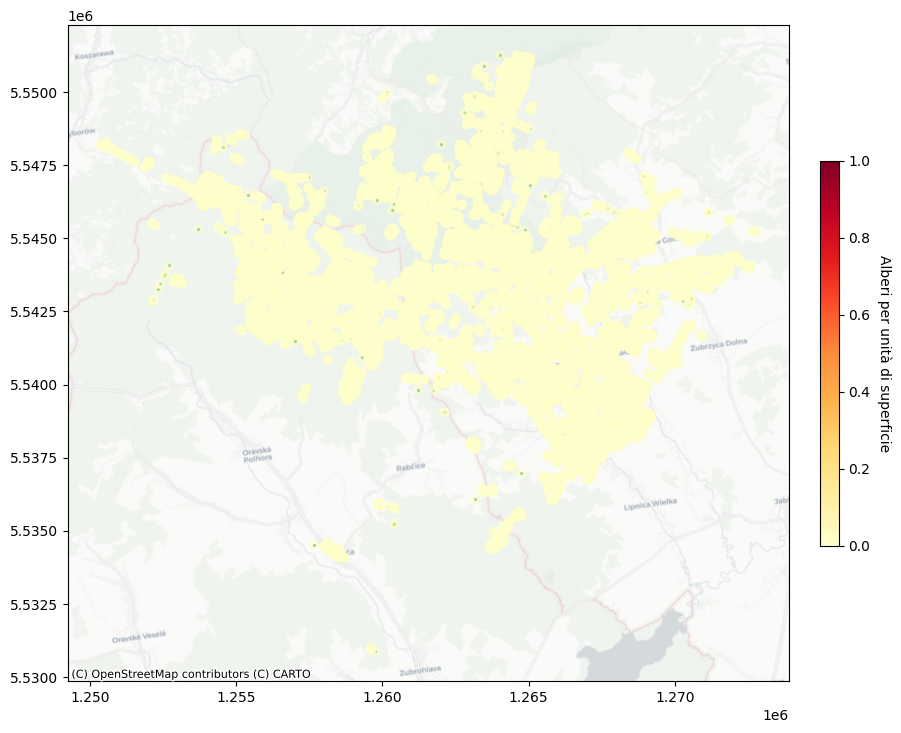

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
bologna_trees.to_crs(epsg=3857).plot(ax=ax, marker='o', markersize=2, color='green', alpha=0.5)
ctx.add_basemap(ax=ax, crs=bologna_trees.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# crea una heatmap basata sulle coordinate degli alberi
gdf_heatmap = bologna_trees.copy()
gdf_heatmap['geometry'] = gdf_heatmap['geometry'].centroid
gdf_heatmap['weight'] = 1
heatmap = gdf_heatmap.to_crs(epsg=3857).plot(column='weight', cmap='YlOrRd', alpha=0.5, ax=ax)

# aggiungi una legenda alla heatmap
sm = plt.cm.ScalarMappable(cmap='YlOrRd')
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04, shrink=0.5)
cbar.ax.set_ylabel('Alberi per unità di superficie', rotation=270, labelpad=15)

# mostra la mappa con la heatmap
plt.show()


In [ ]:
statistical_areas = gpd.read_file(statistical_areas_url )
green_areas = gpd.read_file(green_areas_url)

<AxesSubplot:>

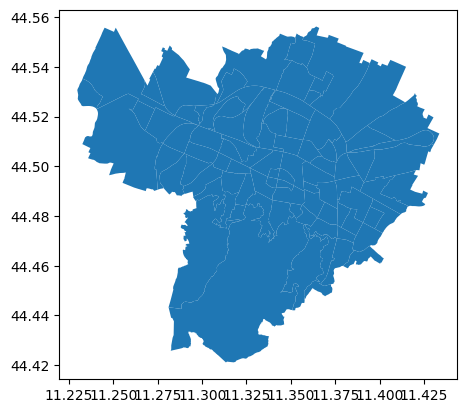

In [ ]:
statistical_areas.plot()

<AxesSubplot:>

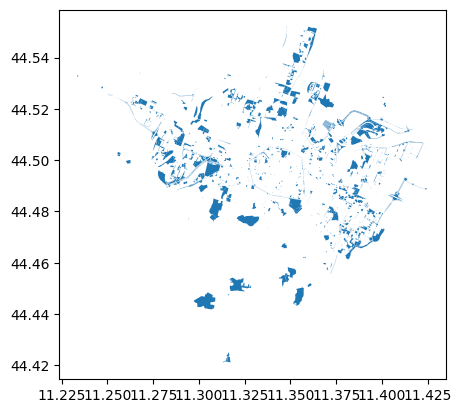

In [ ]:
green_areas.plot()